In [40]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import pathlib
import tqdm
import annotation, misc, hyspec_io, image_render
import skimage.exposure
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

In [2]:
# Paths
pca_dataset_train_path = pathlib.Path('/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/5b_Rad_Georef_SGC_PCA-spectra/20210825_Olberg_PCA_TrainValDataset.npz')
pca_dataset_test_path = pathlib.Path('/media/mha114/Massimal/Larvik_Olberg/Hyperspectral/20210825/OlbergAreaS/5b_Rad_Georef_SGC_PCA-spectra/20210825_Olberg_PCA_TestDataset.npz')

In [19]:
# Load training data
with np.load(pca_dataset_train_path,allow_pickle=True) as npz_files:
    X = npz_files['pca_scores']
    y_orig = npz_files['labels']
    class_dict_orig = npz_files['class_dict'].item()  # Use item() to convert from 0-dim array back to dict

In [20]:
class_dict_orig

{'Sand': 1,
 'Zostera marina': 2,
 'Zostera marina with turf algae': 3,
 'Rockweed': 4,
 'Other algae': 5,
 'Zostera marina - NGT': 6,
 'Rockweed - NGT': 7,
 'Other algae - NGT': 8}

In [21]:
# Merge NGT labels with other labels
classes_to_merge = [['Sand'],
                    ['Zostera marina', 'Zostera marina - NGT'],
                    ['Zostera marina with turf algae'],
                    ['Rockweed','Rockweed - NGT'],
                    ['Other algae','Other algae - NGT']]
merged_class_names = ['Sand',
                      'Zostera marina',
                      'Zostera marina with turf algae',
                      'Rockweed',
                      'Other algae']
class_dict, y = annotation.merge_classes_in_label_vector(class_dict_orig,y_orig,classes_to_merge,merged_class_names)

In [29]:
# Split into training and testing datasets
X_train,X_val,y_train,y_val = sklearn.model_selection.train_test_split(X,y,train_size=0.7)

In [88]:
# Random forest classifier
# rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=10,max_depth=10)
# rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
# rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=20,min_samples_leaf=0.001)
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=30,max_depth=10,max_samples=0.3)


In [91]:
rfc.feature_importances_

array([0.33019285, 0.24291873, 0.08555529, 0.15777666, 0.05034128,
       0.04247088, 0.08279354, 0.00795076])

In [89]:
# Train classifier and use it on validation data
rfc.fit(X_train,y_train)
y_val_pred = rfc.predict(X_val)

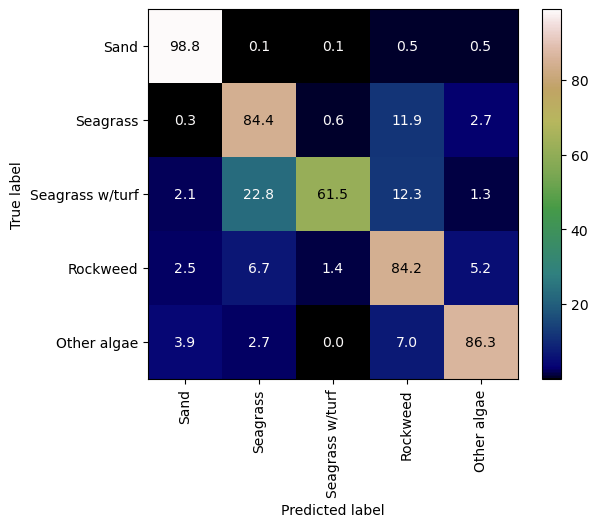

In [90]:
# Show confusion matrix
display_labels = ['Sand', 'Seagrass', 'Seagrass w/turf','Rockweed','Other algae']
confusion_matrix = sklearn.metrics.confusion_matrix(y_val,y_val_pred,normalize='true')
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix*100,display_labels=display_labels)
disp.plot(xticks_rotation='vertical',cmap='gist_earth',values_format='.1f')
plt.show()